# Introduction
The data for this project is pulled from a Netflix dataset on Kaggle. Its purpose is to visualize which various Netflix data.

## Importing the data
Start by bringing in the CSV data into Python program. We then parse the data using the CSV package. Lastly we close the CSV file after we have read the information.

In [1]:
import matplotlib.pyplot as plt
import csv
from collections import Counter
import numpy as np

In [2]:
with open('data/netflix_titles.csv', 'r', encoding ='utf-8') as file:
    netflix_data = csv.DictReader(file)
    data_list = []

    for row in netflix_data:
        data_list.append(row)

### Test to see if data is being read properly

In [3]:
data_list[0]

{'show_id': '81145628',
 'type': 'Movie',
 'title': 'Norm of the North: King Sized Adventure',
 'director': 'Richard Finn, Tim Maltby',
 'cast': 'Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson',
 'country': 'United States, India, South Korea, China',
 'date_added': 'September 9, 2019',
 'release_year': '2019',
 'rating': 'TV-PG',
 'duration': '90 min',
 'listed_in': 'Children & Family Movies, Comedies',
 'description': 'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'}

# Create a bar graph of which countries produced the most content on Netflix
Format the data to create a list of where each movie or show was produced. Then count the number of productions for each country.

In [4]:
country_list = []

for entry in data_list:
    country_names = entry['country'].split(", ")
    if country_names[0] == "":
        continue
    for country in country_names:
        country_list.append(country)
        
production_totals = dict(Counter(country_list))
print(production_totals)

{'United States': 2609, 'India': 838, 'South Korea': 162, 'China': 120, 'United Kingdom': 601, 'Spain': 178, 'Bulgaria': 8, 'Canada': 318, 'Chile': 23, 'Denmark': 38, 'Sweden': 33, 'Netherlands': 37, 'Belgium': 66, 'France': 271, 'Uruguay': 9, 'United States,': 1, 'Thailand': 56, 'Pakistan': 23, 'Turkey': 87, 'Brazil': 66, 'Italy': 67, 'Indonesia': 52, 'Ireland': 33, 'Hong Kong': 97, 'Morocco': 6, 'Mexico': 129, 'Vietnam': 4, 'Argentina': 68, 'Nigeria': 36, 'Japan': 231, 'Germany': 151, 'Greece': 8, 'Norway': 21, 'Switzerland': 15, 'United Arab Emirates': 21, 'Lebanon': 9, 'Cambodia': 3, 'Russia': 21, 'Poland': 26, 'Israel': 26, 'Australia': 126, 'Portugal': 4, 'Egypt': 54, 'Taiwan': 75, 'Austria': 10, 'Czech Republic': 15, 'Senegal': 2, 'Soviet Union': 3, 'Peru': 9, 'Ukraine': 3, 'Malaysia': 21, 'South Africa': 30, 'Nepal': 2, 'Philippines': 47, 'Serbia': 5, 'Colombia': 36, 'Singapore': 30, 'Luxembourg': 7, 'West Germany': 5, 'Cayman Islands': 1, 'New Zealand': 23, 'Venezuela': 3, 'Jo

### Sort production_totals by descending values

In [5]:
productions_sorted = {}
sorted_countries = sorted(production_totals, key=production_totals.get, reverse=True)

for w in sorted_countries:
    productions_sorted[w] = production_totals[w]

print(productions_sorted)

{'United States': 2609, 'India': 838, 'United Kingdom': 601, 'Canada': 318, 'France': 271, 'Japan': 231, 'Spain': 178, 'South Korea': 162, 'Germany': 151, 'Mexico': 129, 'Australia': 126, 'China': 120, 'Hong Kong': 97, 'Turkey': 87, 'Taiwan': 75, 'Argentina': 68, 'Italy': 67, 'Belgium': 66, 'Brazil': 66, 'Thailand': 56, 'Egypt': 54, 'Indonesia': 52, 'Philippines': 47, 'Denmark': 38, 'Netherlands': 37, 'Nigeria': 36, 'Colombia': 36, 'Sweden': 33, 'Ireland': 33, 'South Africa': 30, 'Singapore': 30, 'Poland': 26, 'Israel': 26, 'Chile': 23, 'Pakistan': 23, 'New Zealand': 23, 'Norway': 21, 'United Arab Emirates': 21, 'Russia': 21, 'Malaysia': 21, 'Switzerland': 15, 'Czech Republic': 15, 'Austria': 10, 'Uruguay': 9, 'Lebanon': 9, 'Peru': 9, 'Finland': 9, 'Bulgaria': 8, 'Greece': 8, 'Luxembourg': 7, 'Morocco': 6, 'Jordan': 6, 'Iceland': 6, 'Qatar': 6, 'Romania': 6, 'Serbia': 5, 'West Germany': 5, 'Hungary': 5, 'Vietnam': 4, 'Portugal': 4, 'Iran': 4, 'Croatia': 4, 'Cambodia': 3, 'Soviet Union'

### Narrow down results to 10 countries with highest production values, so they will all fit on graph

In [6]:
top10 = dict(list(productions_sorted.items())[0: 10])
print(top10)

{'United States': 2609, 'India': 838, 'United Kingdom': 601, 'Canada': 318, 'France': 271, 'Japan': 231, 'Spain': 178, 'South Korea': 162, 'Germany': 151, 'Mexico': 129}


## Create a graph
Display the data we collected on a graph using matplotlib.

<BarContainer object of 10 artists>

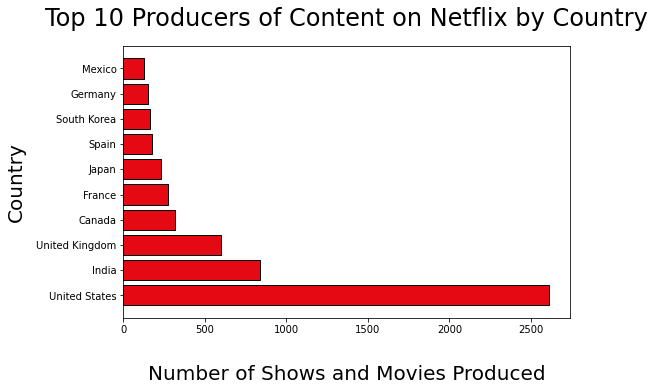

In [7]:
plt.figure(figsize=(8, 5))
plt.title("Top 10 Producers of Content on Netflix by Country", fontsize=24, pad=20)
plt.xlabel("Number of Shows and Movies Produced", labelpad=30, fontsize=20)
plt.ylabel("Country", labelpad=10, fontsize=20)

# Create x axis labels
x = []
for k, v in top10.items():
    x.append(v)
    
# Create y axis labels
y = []
for k, v in top10.items():
    y.append(k)

plt.barh(y, x, color='#E50914', edgecolor='black')

## Graph Analysis
The US produces much more content than any other country. This is unsurprising given Netflix is an American company. However, Netflix is available internationally. This is indicative of the global popularity of American media. This may also have sociological implications such as the globalization of American culture and values. Also worth noting is that the top 4 countries are English-speaking countries. People who wish to work in the industry can increase their chances by learning English and moving to these countries.

# Create a double bar graph that shows how many TV Shows and Movies were produced by each country from the previous graph
If the type is 'Movie' and the country is in the top 10 content producers, append the country to the movies_list.   Count the number of movies each country produced by counting the number of times the country appears in the list.

In [8]:
movies_list = []

for entry in data_list:
    type_name = entry['type']
    if type_name == 'Movie':
        country_names = entry['country'].split(", ")
        if country_names[0] == "":
            continue
        for country in country_names:
            if country_names[0] == 'United States':
                movies_list.append(country)
            if country_names[0] == 'India':
                movies_list.append(country)
            if country_names[0] == 'United Kingdom':
                movies_list.append(country)
            if country_names[0] == 'Canada':
                movies_list.append(country)
            if country_names[0] == 'France':
                movies_list.append(country)
            if country_names[0] == 'Japan':
                movies_list.append(country)
            if country_names[0] == 'Spain':
                movies_list.append(country)
            if country_names[0] == 'South Korea':
                movies_list.append(country)
            if country_names[0] == 'Germany':
                movies_list.append(country)
            if country_names[0] == 'Mexico':
                movies_list.append(country)
            else:
                break
            
movies_produced = dict(Counter(movies_list))
del movies_produced['Argentina']  # Argentina, Netherlands, and Finland ended up in list somehow, so we delete them here.
del movies_produced['Netherlands']
del movies_produced['Finland']
print(movies_produced)

{'United States': 1687, 'United Kingdom': 281, 'France': 98, 'India': 753, 'Canada': 130, 'South Korea': 37, 'Spain': 102, 'Mexico': 66, 'Japan': 52, 'Germany': 54}


## Same as above but for TV Shows
If the type is 'TV Show' and country is in the top 10 content producers, append the country to the movies_list.   Count the number of shows each country produced by counting the number of times the country appears in the list.

In [9]:
shows_list = []

for entry in data_list:
    type_name = entry['type']
    if type_name == 'TV Show':
        country_names = entry['country'].split(", ")
        if country_names[0] == "":
            continue
        for country in country_names:
            if country_names[0] == 'United States':
                shows_list.append(country)
            if country_names[0] == 'India':
                shows_list.append(country)
            if country_names[0] == 'United Kingdom':
                shows_list.append(country)
            if country_names[0] == 'Canada':
                shows_list.append(country)
            if country_names[0] == 'France':
                shows_list.append(country)
            if country_names[0] == 'Japan':
                shows_list.append(country)
            if country_names[0] == 'Spain':
                shows_list.append(country)
            if country_names[0] == 'South Korea':
                shows_list.append(country)
            if country_names[0] == 'Germany':
                shows_list.append(country)
            if country_names[0] == 'Mexico':
                shows_list.append(country)
            else:
                break
            
shows_produced = dict(Counter(shows_list))
print(shows_produced)

{'United States': 624, 'Spain': 39, 'France': 50, 'United Kingdom': 201, 'India': 55, 'Mexico': 33, 'South Korea': 109, 'Japan': 132, 'Canada': 76, 'Germany': 11}


## Create a graph
Display the data we collected on a graph using matplotlib.

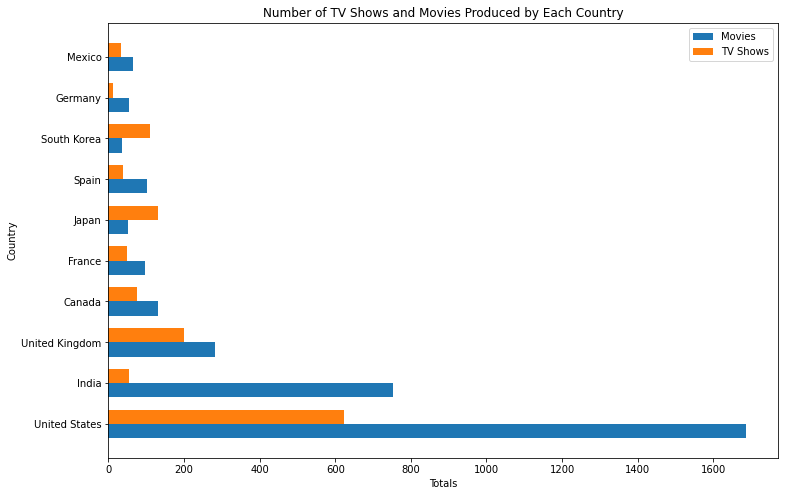

In [10]:
labels = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
movies2 = [movies_produced['United States'], movies_produced['India'], movies_produced['United Kingdom'], movies_produced['Canada'],
          movies_produced['France'], movies_produced['Japan'], movies_produced['Spain'], movies_produced['South Korea'], movies_produced['Germany'],
           movies_produced['Mexico']]
tv_shows = [shows_produced['United States'], shows_produced['India'], shows_produced['United Kingdom'], shows_produced['Canada'],
          shows_produced['France'], shows_produced['Japan'], shows_produced['Spain'], shows_produced['South Korea'], shows_produced['Germany'],
           shows_produced['Mexico']]

y = np.arange(len(labels))  # the label locations

width = .35
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(y - width/2, movies2, width, label='Movies')
rects2 = ax.barh(y + width/2, tv_shows, width, label='TV Shows')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Totals')
ax.set_ylabel('Country')
ax.set_title('Number of TV Shows and Movies Produced by Each Country')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

## Graph Analysis
Each country produces more movies than shows except for Japan and South Korea.  The US produces nearly three times more movies than shows.  India produces about 10 times more movies than shows.  The United Kingdom, Canada, and France produce only a little less shows than movies.  This indicates that production of movies tends to be more popular, as 8/10 countries produce more movies than shows.  It may be that movies are more lucrative.

# Create another graph to analyze top movie producers by country
Take the original data_list and pull the value of key 'type' if it is a Movie, and the value of key 'country'.  Then count the number of Movies each country produced.

In [11]:
movie_list = []
for i in range(len(data_list)):
    if data_list[i]['type'] == 'Movie':
        movie_list.append(data_list[i])

country_list2 = []
for something in movie_list:
    country_names = something['country'].split(", ")
    if country_names[0] == "":
        continue
    for country in country_names:
        country_list2.append(country)
        
movie_totals = dict(Counter(country_list2))
print(movie_totals)

{'United States': 1923, 'India': 783, 'South Korea': 46, 'China': 84, 'United Kingdom': 378, 'Bulgaria': 8, 'Spain': 133, 'Canada': 211, 'Chile': 19, 'Denmark': 29, 'Sweden': 25, 'Netherlands': 31, 'Belgium': 58, 'France': 201, 'Uruguay': 9, 'United States,': 1, 'Thailand': 38, 'Pakistan': 19, 'Turkey': 62, 'Brazil': 48, 'Italy': 52, 'Indonesia': 50, 'Ireland': 22, 'Hong Kong': 93, 'Morocco': 6, 'Mexico': 84, 'Vietnam': 4, 'Argentina': 54, 'Nigeria': 36, 'Greece': 5, 'Norway': 13, 'Switzerland': 14, 'United Arab Emirates': 20, 'Japan': 75, 'Cambodia': 3, 'Russia': 7, 'Israel': 17, 'Germany': 126, 'Australia': 76, 'Portugal': 4, 'Egypt': 45, 'Austria': 9, 'Czech Republic': 10, 'Senegal': 2, 'Soviet Union': 3, 'Peru': 9, 'Ukraine': 1, 'Malaysia': 14, 'South Africa': 25, 'Nepal': 2, 'Philippines': 46, 'Poland': 21, 'Serbia': 5, 'Colombia': 13, 'Singapore': 17, 'Luxembourg': 7, 'Cayman Islands': 1, 'New Zealand': 15, 'Venezuela': 3, 'Jordan': 5, 'Saudi Arabia': 1, 'Iceland': 5, 'Poland,': 

### Sort movie_totals by descending values

In [12]:
movies_sorted = {}
sort_movies = sorted(movie_totals, key=movie_totals.get, reverse=True)

for w in sort_movies:
    movies_sorted[w] = movie_totals[w]

print(movies_sorted)

{'United States': 1923, 'India': 783, 'United Kingdom': 378, 'Canada': 211, 'France': 201, 'Spain': 133, 'Germany': 126, 'Hong Kong': 93, 'China': 84, 'Mexico': 84, 'Australia': 76, 'Japan': 75, 'Turkey': 62, 'Belgium': 58, 'Argentina': 54, 'Italy': 52, 'Indonesia': 50, 'Brazil': 48, 'South Korea': 46, 'Philippines': 46, 'Egypt': 45, 'Thailand': 38, 'Nigeria': 36, 'Netherlands': 31, 'Denmark': 29, 'Sweden': 25, 'South Africa': 25, 'Ireland': 22, 'Poland': 21, 'United Arab Emirates': 20, 'Chile': 19, 'Pakistan': 19, 'Israel': 17, 'Singapore': 17, 'New Zealand': 15, 'Switzerland': 14, 'Malaysia': 14, 'Norway': 13, 'Colombia': 13, 'Czech Republic': 10, 'Taiwan': 10, 'Uruguay': 9, 'Austria': 9, 'Peru': 9, 'Bulgaria': 8, 'Russia': 7, 'Luxembourg': 7, 'Morocco': 6, 'Qatar': 6, 'Finland': 6, 'Romania': 6, 'Greece': 5, 'Serbia': 5, 'Jordan': 5, 'Iceland': 5, 'Vietnam': 4, 'Portugal': 4, 'Iran': 4, 'Hungary': 4, 'Cambodia': 3, 'Soviet Union': 3, 'Venezuela': 3, 'West Germany': 3, 'Slovenia': 3,

### Limit to top 10 Movie producers by country so it can fit on graph

In [13]:
top10_movies = dict(list(movies_sorted.items())[0: 10])
print(top10_movies)

{'United States': 1923, 'India': 783, 'United Kingdom': 378, 'Canada': 211, 'France': 201, 'Spain': 133, 'Germany': 126, 'Hong Kong': 93, 'China': 84, 'Mexico': 84}


## Create a graph
Display the data we collected on a graph using matplotlib.

<BarContainer object of 10 artists>

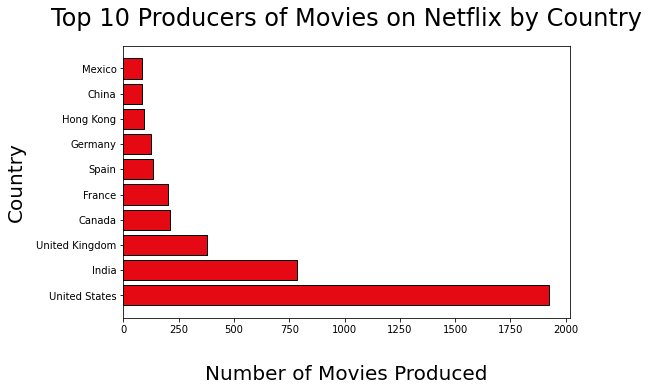

In [14]:
plt.figure(figsize=(8, 5))
plt.title("Top 10 Producers of Movies on Netflix by Country", fontsize=24, pad=20)
plt.xlabel("Number of Movies Produced", labelpad=30, fontsize=20)
plt.ylabel("Country", labelpad=10, fontsize=20)

# Create x axis labels
x = []
for k, v in top10_movies.items():
    x.append(v)
    
# Create y axis labels
y = []
for k, v in top10_movies.items():
    y.append(k)

plt.barh(y, x, color='#E50914', edgecolor='black')

## Graph Analysis
This graph is very similar to the top 10 producers of content on Netflix.  However, this specifically totals the top 10 producers of movies.  Because of this we can see that China and Hong Kong have moved onto the list, though they are absent from the top 10 content producers list.

# Create another graph to analyze top TV show producers by country
Take the original data_list and pull the value of key 'type' if it is a TV Show, and the value of key 'country'.  Then count the number of TV shows each country produced.

In [15]:
show_list = []
for i in range(len(data_list)):
    if data_list[i]['type'] == 'TV Show':
        show_list.append(data_list[i])

country_list3 = []
for thing in show_list:
    country_names = thing['country'].split(", ")
    if country_names[0] == "":
        continue
    for country in country_names:
        country_list3.append(country)
        
show_totals = dict(Counter(country_list3))
print(show_totals)

{'United States': 686, 'Spain': 45, 'France': 70, 'United Kingdom': 223, 'India': 55, 'Mexico': 45, 'South Korea': 116, 'Japan': 156, 'Canada': 107, 'Germany': 25, 'Thailand': 18, 'Lebanon': 7, 'Poland': 5, 'China': 36, 'Taiwan': 65, 'Australia': 50, 'Russia': 14, 'Norway': 8, 'Italy': 15, 'Switzerland': 1, 'Czech Republic': 5, 'Brazil': 18, 'Argentina': 14, 'West Germany': 2, 'Turkey': 25, 'Malaysia': 7, 'Colombia': 23, 'Iceland': 1, 'Belgium': 8, 'Sweden': 8, 'Singapore': 13, 'Denmark': 9, 'Netherlands': 6, 'Hong Kong': 4, 'Ireland': 11, 'Chile': 4, 'Egypt': 9, 'Ukraine': 2, 'Jordan': 1, 'New Zealand': 8, 'Israel': 9, 'Greece': 3, 'United Arab Emirates': 1, 'South Africa': 5, 'Cuba': 1, 'Azerbaijan': 1, 'Mauritius': 1, 'Pakistan': 4, 'Finland': 3, 'Indonesia': 2, 'Philippines': 1, 'Saudi Arabia': 1, 'Syria': 1, 'Kuwait': 1, 'Malta': 1, 'Croatia': 1, 'Hungary': 1, 'Cyprus': 1, 'Austria': 1}


### Sort show_totals by descending values

In [16]:
shows_sorted = {}
sort_shows = sorted(show_totals, key=show_totals.get, reverse=True)

for w in sort_shows:
    shows_sorted[w] = show_totals[w]

print(shows_sorted)

{'United States': 686, 'United Kingdom': 223, 'Japan': 156, 'South Korea': 116, 'Canada': 107, 'France': 70, 'Taiwan': 65, 'India': 55, 'Australia': 50, 'Spain': 45, 'Mexico': 45, 'China': 36, 'Germany': 25, 'Turkey': 25, 'Colombia': 23, 'Thailand': 18, 'Brazil': 18, 'Italy': 15, 'Russia': 14, 'Argentina': 14, 'Singapore': 13, 'Ireland': 11, 'Denmark': 9, 'Egypt': 9, 'Israel': 9, 'Norway': 8, 'Belgium': 8, 'Sweden': 8, 'New Zealand': 8, 'Lebanon': 7, 'Malaysia': 7, 'Netherlands': 6, 'Poland': 5, 'Czech Republic': 5, 'South Africa': 5, 'Hong Kong': 4, 'Chile': 4, 'Pakistan': 4, 'Greece': 3, 'Finland': 3, 'West Germany': 2, 'Ukraine': 2, 'Indonesia': 2, 'Switzerland': 1, 'Iceland': 1, 'Jordan': 1, 'United Arab Emirates': 1, 'Cuba': 1, 'Azerbaijan': 1, 'Mauritius': 1, 'Philippines': 1, 'Saudi Arabia': 1, 'Syria': 1, 'Kuwait': 1, 'Malta': 1, 'Croatia': 1, 'Hungary': 1, 'Cyprus': 1, 'Austria': 1}


### Limit to top 10 TV Show producers by country so it can fit on graph

In [17]:
top10_shows = dict(list(shows_sorted.items())[0: 10])
print(top10_shows)

{'United States': 686, 'United Kingdom': 223, 'Japan': 156, 'South Korea': 116, 'Canada': 107, 'France': 70, 'Taiwan': 65, 'India': 55, 'Australia': 50, 'Spain': 45}


## Create a graph
Display the data we collected on a graph using matplotlib.

<BarContainer object of 10 artists>

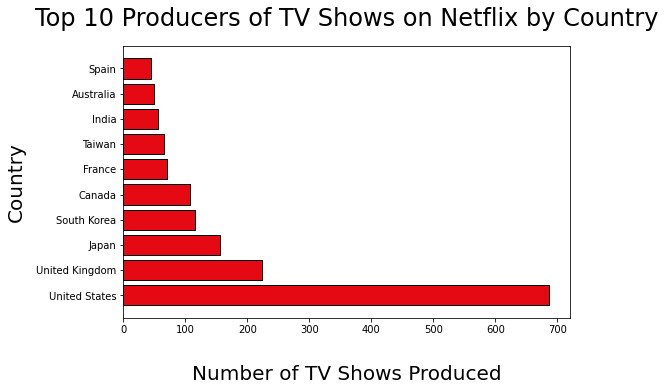

In [18]:
plt.figure(figsize=(8, 5))
plt.title("Top 10 Producers of TV Shows on Netflix by Country", fontsize=24, pad=20)
plt.xlabel("Number of TV Shows Produced", labelpad=30, fontsize=20)
plt.ylabel("Country", labelpad=10, fontsize=20)

# Create x axis labels
x = []
for k, v in top10_shows.items():
    x.append(v)
    
# Create y axis labels
y = []
for k, v in top10_shows.items():
    y.append(k)

plt.barh(y, x, color='#E50914', edgecolor='black')

## Graph Analysis
This graph is very similar to the top 10 producers of content on Netflix.  However, this specifically totals the top 10 producers of TV Shows.  Because of this we can see that Australia and Taiwan have moved onto the list, though they are absent from the top 10 content producers list.  Note too that Mexico and Germany are not in the top 10 producers of TV Shows, but they are both top 10 content producers.

# Create a bar graph which shows the most common genres on Netflix
Format the data to display which genres appear most in the Netflix library.

In [19]:
genre_list = []

for entry in data_list:
    genres = entry['listed_in'].split(", ")
    if genres == "":
        continue
    for genre in genres:
        genre_list.append(genre)

genre_totals = dict(Counter(genre_list))
print(genre_totals)

{'Children & Family Movies': 378, 'Comedies': 1113, 'Stand-Up Comedy': 281, "Kids' TV": 328, 'Crime TV Shows': 363, 'International TV Shows': 1001, 'Spanish-Language TV Shows': 117, 'International Movies': 1927, 'Sci-Fi & Fantasy': 193, 'Thrillers': 392, 'Docuseries': 279, 'Science & Nature TV': 67, 'Action & Adventure': 597, 'Dramas': 1623, 'Cult Movies': 55, 'Independent Movies': 552, 'Romantic Movies': 376, 'Documentaries': 668, 'Horror Movies': 262, 'Romantic TV Shows': 278, 'TV Comedies': 436, 'TV Dramas': 599, 'TV Thrillers': 44, 'TV Mysteries': 69, 'British TV Shows': 210, 'Music & Musicals': 243, 'Reality TV': 153, 'TV Action & Adventure': 126, 'Anime Features': 45, 'Teen TV Shows': 44, 'Faith & Spirituality': 47, 'Korean TV Shows': 132, 'Anime Series': 117, 'LGBTQ Movies': 60, 'TV Horror': 54, 'Movies': 56, 'Stand-Up Comedy & Talk Shows': 42, 'TV Sci-Fi & Fantasy': 68, 'Classic Movies': 84, 'Sports Movies': 157, 'TV Shows': 10, 'Classic & Cult TV': 24}


### Sort genre_totals by descending values

In [20]:
genres_sorted = {}
sort_genres = sorted(genre_totals, key=genre_totals.get, reverse=True)

for w in sort_genres:
    genres_sorted[w] = genre_totals[w]

print(genres_sorted)

{'International Movies': 1927, 'Dramas': 1623, 'Comedies': 1113, 'International TV Shows': 1001, 'Documentaries': 668, 'TV Dramas': 599, 'Action & Adventure': 597, 'Independent Movies': 552, 'TV Comedies': 436, 'Thrillers': 392, 'Children & Family Movies': 378, 'Romantic Movies': 376, 'Crime TV Shows': 363, "Kids' TV": 328, 'Stand-Up Comedy': 281, 'Docuseries': 279, 'Romantic TV Shows': 278, 'Horror Movies': 262, 'Music & Musicals': 243, 'British TV Shows': 210, 'Sci-Fi & Fantasy': 193, 'Sports Movies': 157, 'Reality TV': 153, 'Korean TV Shows': 132, 'TV Action & Adventure': 126, 'Spanish-Language TV Shows': 117, 'Anime Series': 117, 'Classic Movies': 84, 'TV Mysteries': 69, 'TV Sci-Fi & Fantasy': 68, 'Science & Nature TV': 67, 'LGBTQ Movies': 60, 'Movies': 56, 'Cult Movies': 55, 'TV Horror': 54, 'Faith & Spirituality': 47, 'Anime Features': 45, 'TV Thrillers': 44, 'Teen TV Shows': 44, 'Stand-Up Comedy & Talk Shows': 42, 'Classic & Cult TV': 24, 'TV Shows': 10}


### Limit to top 15 genres to fit on graph

In [21]:
top_15 = dict(list(genres_sorted.items())[0: 15])
print(top_15)

{'International Movies': 1927, 'Dramas': 1623, 'Comedies': 1113, 'International TV Shows': 1001, 'Documentaries': 668, 'TV Dramas': 599, 'Action & Adventure': 597, 'Independent Movies': 552, 'TV Comedies': 436, 'Thrillers': 392, 'Children & Family Movies': 378, 'Romantic Movies': 376, 'Crime TV Shows': 363, "Kids' TV": 328, 'Stand-Up Comedy': 281}


## Create a graph
Display the data we collected on a graph using matplotlib.

<BarContainer object of 15 artists>

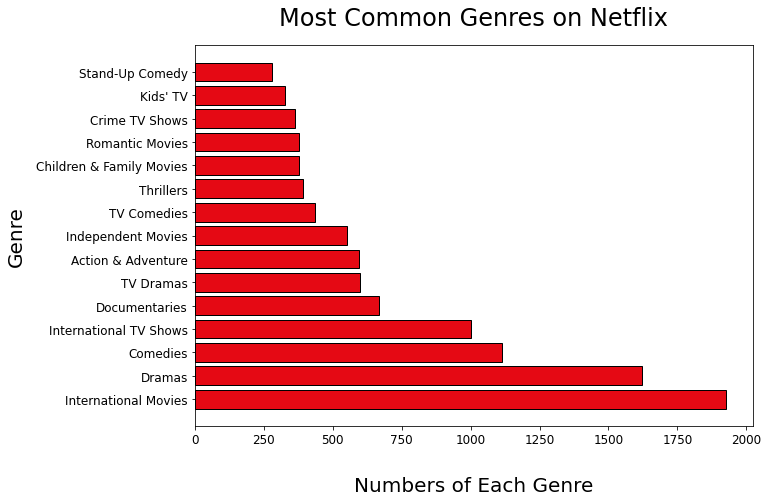

In [22]:
plt.figure(figsize= (10, 7))
plt.title("Most Common Genres on Netflix", fontsize=24, pad=20)
plt.xlabel("Numbers of Each Genre", labelpad=30, fontsize=20)
plt.ylabel("Genre", labelpad=10, fontsize=20)

# Create x axis labels
x = []
for k, v in top_15.items():
    x.append(v)
    
# Create y axis labels
y = []
for k, v in top_15.items():
    y.append(k)
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.barh(y, x, color='#E50914', edgecolor='black')

## Graph Analysis
The top genre is International Movies.  This is a vague genre and could mean different things to different people.  It can be assumed that these are American movies in English that have been translated into many languages and are globally popular.  Dramas are the second largest category, perhaps because they create suspense in viewers.  Comedies are third, which may be because everyone likes a good laugh.  International TV shows is probably similar to International Movies.  Surprisingly documentaries are the 5th most popular.  This is good because they tend to be educational. This graph also lets us see again that movies are more numerous than TV Shows on Netflix.